In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Path to the dataset directory
data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Define function to load images and labels
def load_data(folder):
    data = []
    for category in ['NORMAL', 'PNEUMONIA']:
        folder_path = os.path.join(data_dir, folder, category)
        for file in os.listdir(folder_path):
            data.append({
                'file': os.path.join(folder_path, file),
                'category': category
            })
    return pd.DataFrame(data)

# Load train, test, and validation datasets
train_data = load_data('train')
test_data = load_data('test')
val_data = load_data('val')

# Display the first few rows of the train dataset
print(train_data.head())

# Display the count of classes in the train dataset
print(train_data['category'].value_counts())


                                                file category
0  /kaggle/input/chest-xray-pneumonia/chest_xray/...   NORMAL
1  /kaggle/input/chest-xray-pneumonia/chest_xray/...   NORMAL
2  /kaggle/input/chest-xray-pneumonia/chest_xray/...   NORMAL
3  /kaggle/input/chest-xray-pneumonia/chest_xray/...   NORMAL
4  /kaggle/input/chest-xray-pneumonia/chest_xray/...   NORMAL
category
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64


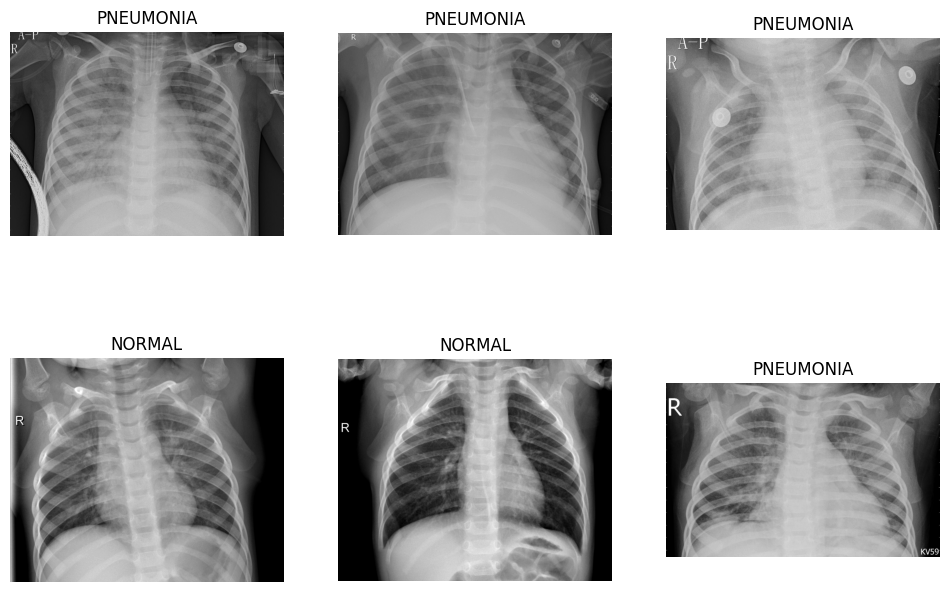

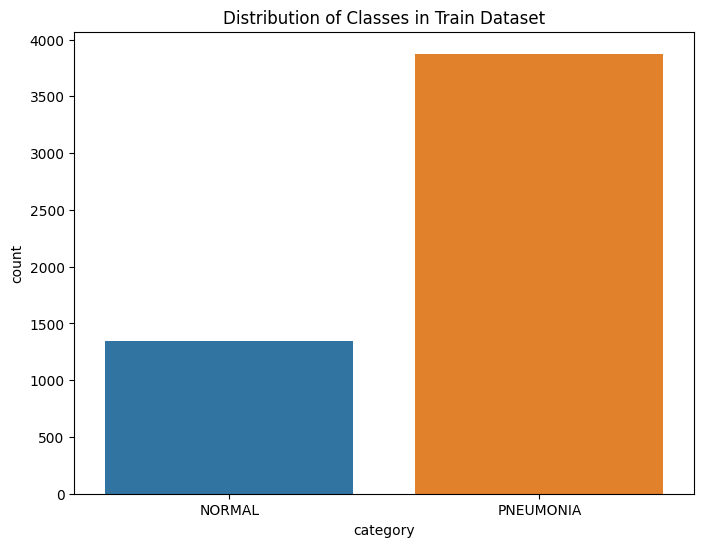

In [5]:
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    random_index = random.randint(0, len(train_data) - 1)
    img_path = train_data['file'].iloc[random_index]
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(train_data['category'].iloc[random_index])
    plt.axis('off')
plt.show()

# Countplot to visualize the distribution of classes in the train dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=train_data)
plt.title('Distribution of Classes in Train Dataset')
plt.show()

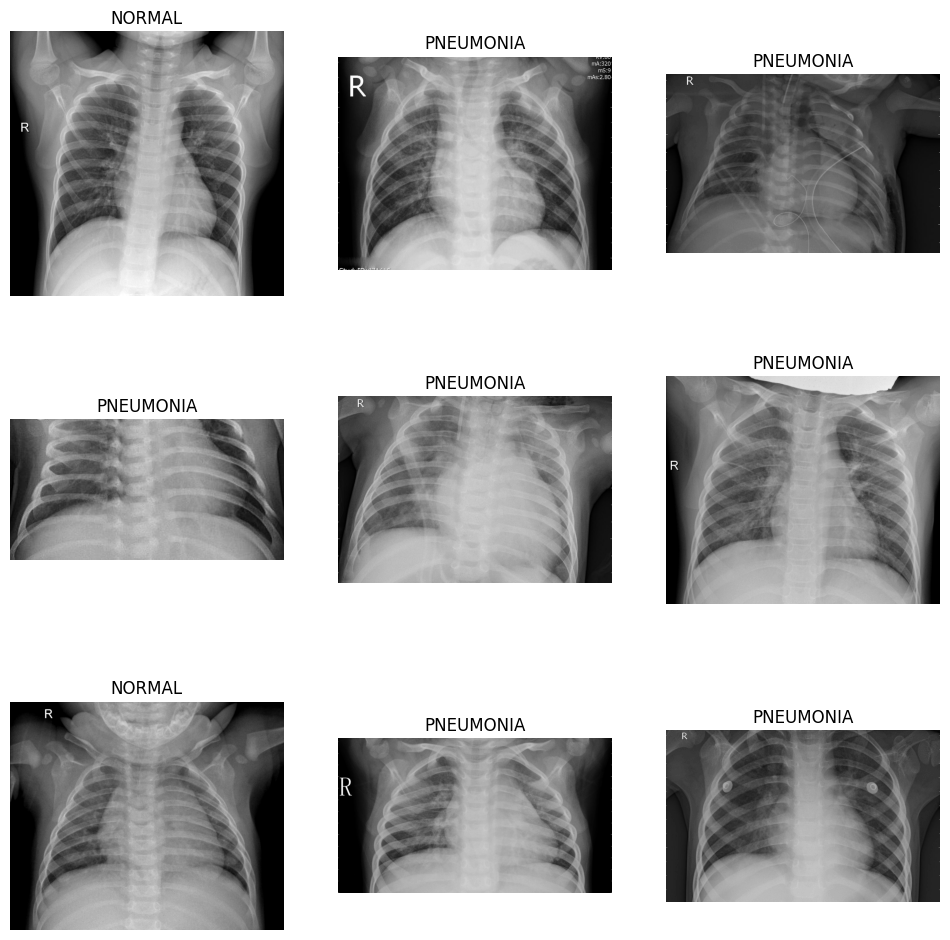

In [6]:
# Display a grid of sample images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    random_index = random.randint(0, len(train_data) - 1)
    img_path = train_data['file'].iloc[random_index]
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(train_data['category'].iloc[random_index])
    plt.axis('off')
plt.show()


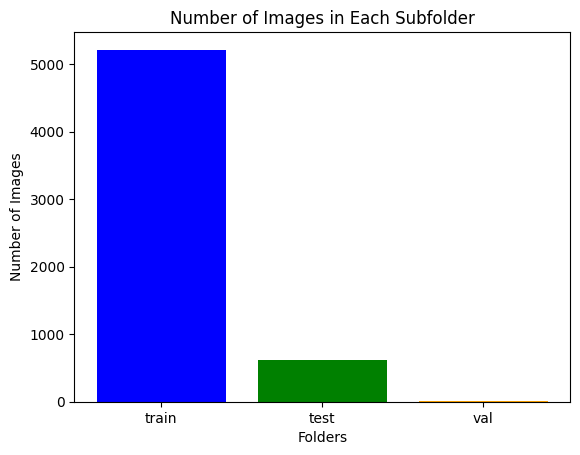

In [8]:
# Bar chart to show the number of images in each subfolder
folders = ['train', 'test', 'val']
num_images = [len(load_data(folder)) for folder in folders]
plt.bar(folders, num_images, color=['blue', 'green', 'orange'])
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subfolder')
plt.show()


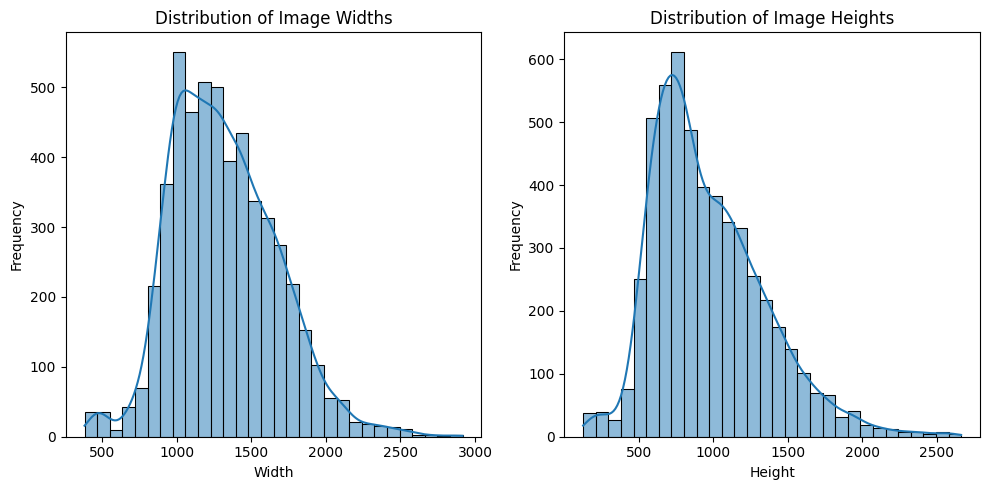

In [9]:
# Distribution of image sizes in the dataset
image_sizes = []
for _, row in train_data.iterrows():
    img_path = row['file']
    img = mpimg.imread(img_path)
    image_sizes.append(img.shape)

# Extract width and height for each image
widths = [size[1] for size in image_sizes]
heights = [size[0] for size in image_sizes]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
